__CAPSTONE PROJECT ON FRAUD DETECTION__


In this project, we explore a simulated dataset containing transaction details such as **amount**, **type**, **nameOrig**, **nameDest**, and more, reflecting activities that may involve fraudulent behavior.
Our objective is to develop a predictive model capable of accurately identifying fraudulent transactions. Given the significant financial and security risks associated with overlooking a fraudulent case, our primary focus is on ensuring the model detects all potential fraud instances, making **recall** for the positive class (**fraud**) a critical metric.

**IMPORTING LIBRARIES**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

__Load Dataset__

In [7]:
df = pd.read_csv('Fraud_Analysis_Dataset.csv')

In [8]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [9]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,11142.000000,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,11142.000000
mean,8.717645,2.131915e+05,9.241173e+05,8.249576e+05,8.883541e+05,1.103211e+06,0.102495
std,16.067479,7.600650e+05,2.143004e+06,2.089894e+06,2.601376e+06,2.982447e+06,0.303312
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,4.946618e+03,4.270000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,1.676126e+04,2.816950e+04,4.420605e+03,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,1.543366e+05,3.040855e+05,1.114126e+05,2.711555e+05,3.186374e+05,0.000000
max,95.000000,1.000000e+07,1.990000e+07,1.300000e+07,3.300000e+07,3.460000e+07,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


__we can see, The dataset consist of 11142 entries ranging from 0 to 11141
Total columns=10
each column's data types are given , 5 of them are float, 2 of them are integer and 3 of them are objects or strings__

In [12]:
print("\nColumn Names:", df.columns.tolist())


Column Names: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud']


In [13]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64


In [14]:
print(df['amount'])

0           181.00
1           181.00
2          2806.00
3          2806.00
4         20128.00
           ...    
11137      6393.71
11138    298799.54
11139    423159.63
11140      1094.03
11141      9235.58
Name: amount, Length: 11142, dtype: float64


**There is no missing value in the dataset**

Even though there is no missing value i have tried filling the missing value with **Median** here, just for remebering the steps 

In [17]:
df['amount'] = df['amount'].fillna(df['amount'].median())

In [18]:
print("missing value after filling:\n", df.isnull().sum())

missing value after filling:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64


In [19]:
print(df[['amount']])

          amount
0         181.00
1         181.00
2        2806.00
3        2806.00
4       20128.00
...          ...
11137    6393.71
11138  298799.54
11139  423159.63
11140    1094.03
11141    9235.58

[11142 rows x 1 columns]


In [20]:
duplicates = df[df.duplicated()]

In [21]:
print(duplicates)

Empty DataFrame
Columns: [step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud]
Index: []


In [22]:
print(df.duplicated().sum())

0


**The dataset has no duplicate rows based on all columns.**

In [24]:
df = df.drop_duplicates()
print("Number of rows after removing duplicates:", len(df))

Number of rows after removing duplicates: 11142


**No duplicates value**

**Next step:**


**EDA(Exploratory Data Analaysis)**


EDA is an initial step in data analysis where you explore a dataset to understand its main characteristics, uncover patterns, spot anomalies, and formulate hypotheses.

In [27]:
print("Dataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())
print("\nMissing Values per Column:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB
None

Basic Statistics:
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  11142.000000  1.114200e+04   1.114200e+04    1.114200e+04   
mean       8.717645  2.131915e+05   9.241173e+05    8.249576e+05   
std       16.067479  7.600650e+05   2.143004e

**Distribution of Fraud vs Non-Fraud Transaction**

visualize the distribution of the "isFraud" column to see the class balance.

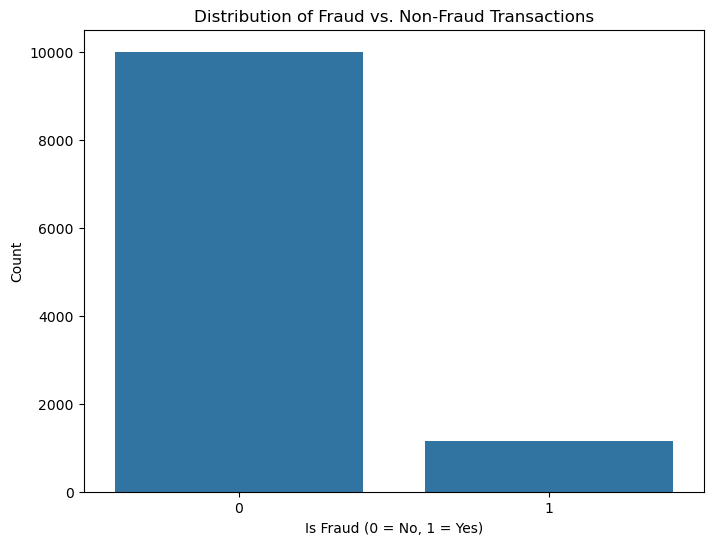

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(x='isFraud', data=df)
plt.title('Distribution of Fraud vs. Non-Fraud Transactions')
plt.xlabel('Is Fraud (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [30]:
fraud_percentage = df['isFraud'].mean() * 100
print(f"Fraud Percentage: {fraud_percentage:.2f}%")

Fraud Percentage: 10.25%


**OUTLIERS AND FEATURES**

Explorng how numeric features (e.g., amount, oldbalanceOrg, newbalanceOrig) differ between fraud and non-fraud transactions using box plots. This will help us identify patterns or outliers that might be indicative of fraud.


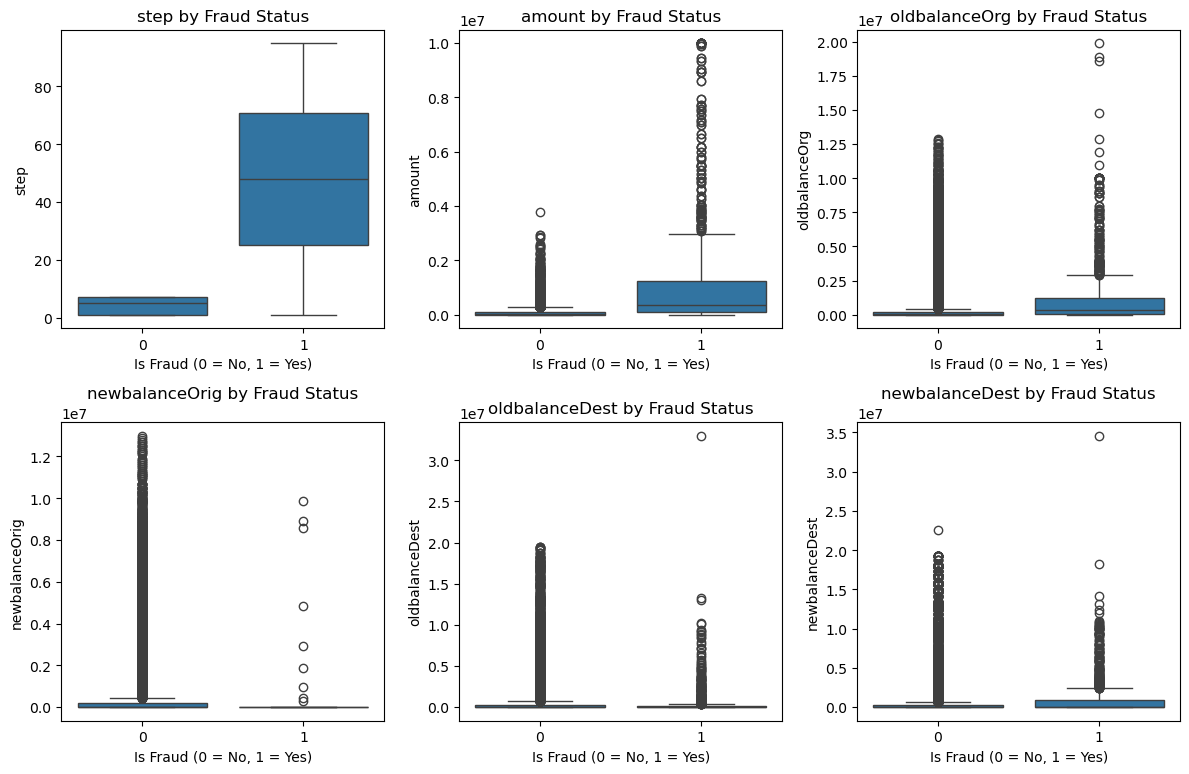

In [32]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('isFraud')  # Exclude isFraud

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='isFraud', y=col, data=df)
    plt.title(f'{col} by Fraud Status')
    plt.xlabel('Is Fraud (0 = No, 1 = Yes)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [33]:
df_encoded = pd.get_dummies(df, columns=['type'])

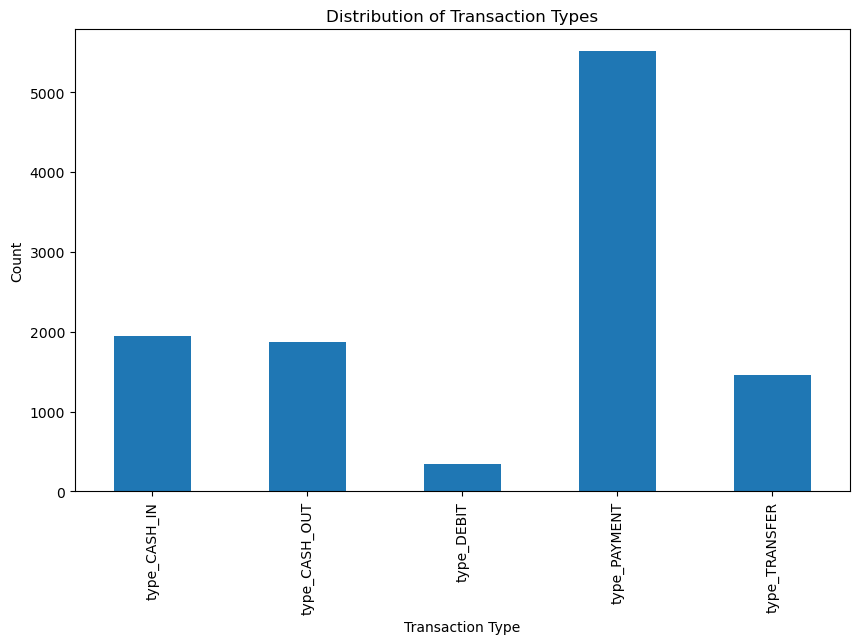

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
df_encoded[['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']].sum().plot(kind='bar')
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

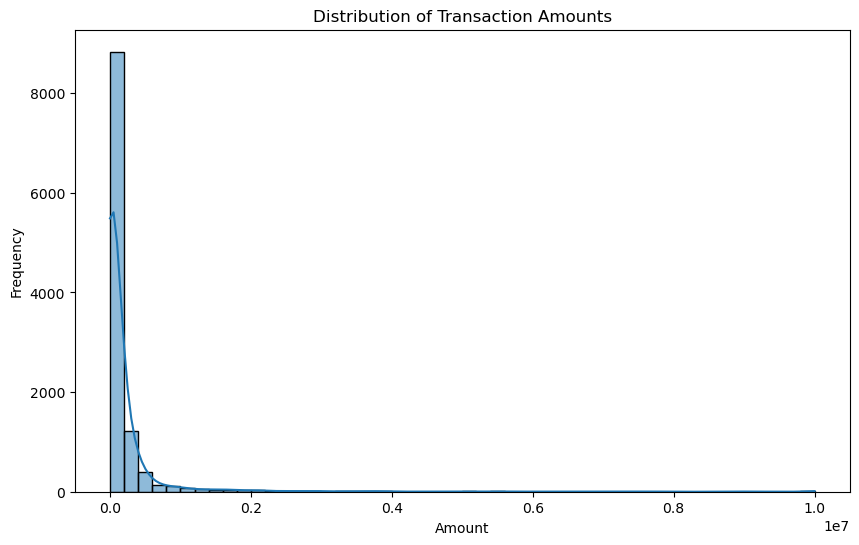

In [35]:
# Plot the distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [36]:
correlation_matrix = df[numeric_cols].corr()

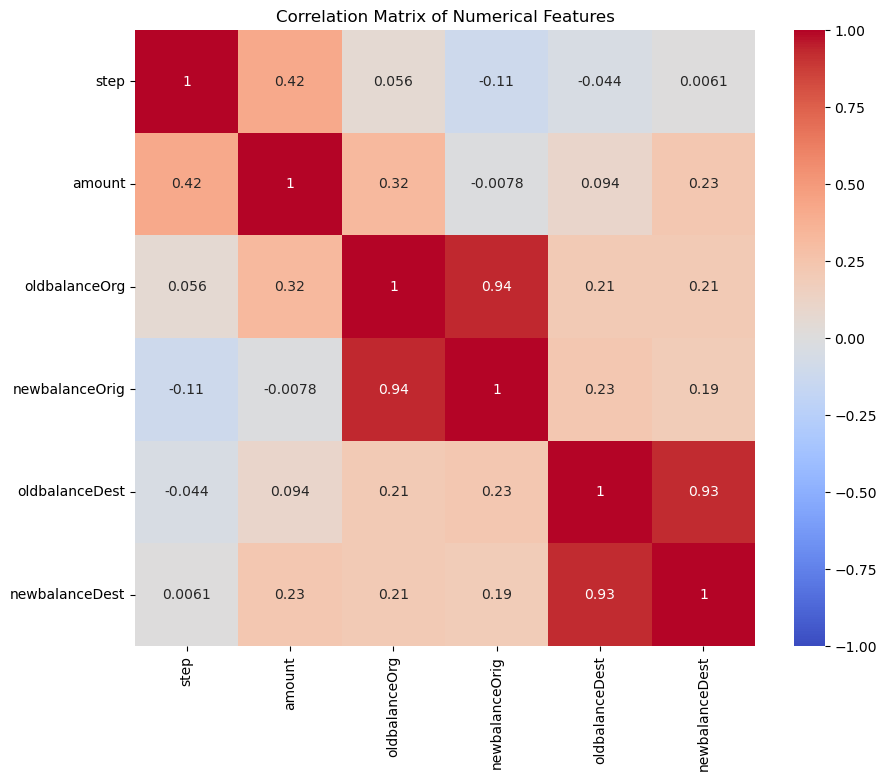

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**FEATURES ENGINEERING**

**Distribution of type by Fraud Status**

The bar chart shows the count of each type category, split by isFraud (0 = No, 1 = Yes).
Observations:
TRANSFER: Large blue bar (non-fraud) and a smaller orange bar (fraud), indicating some fraud cases.
CASH_OUT: Significant blue bar (non-fraud) and a notable orange bar (fraud), suggesting a higher fraud proportion.
CASH_IN, DEBIT, and PAYMENT: Mostly blue (non-fraud), with minimal or no orange (fraud).


Unique values in type:
type
PAYMENT     5510
CASH_IN     1951
CASH_OUT    1871
TRANSFER    1464
DEBIT        346
Name: count, dtype: int64


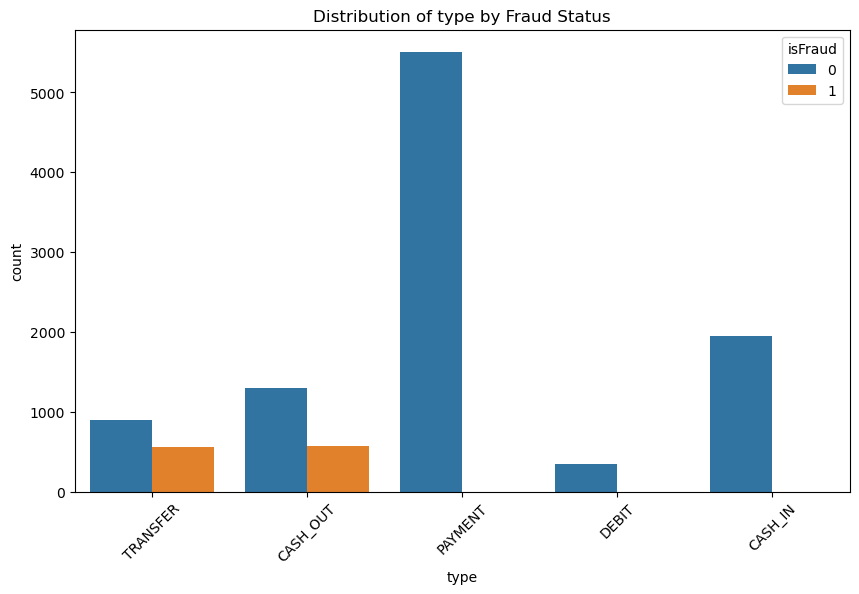


Unique values in nameOrig:
nameOrig
C1305486145    1
C479078480     1
C1602363550    1
C1365013293    1
C1525186016    1
C1364051444    1
C2049210129    1
C1225830367    1
C1984803180    1
C1170952967    1
Name: count, dtype: int64


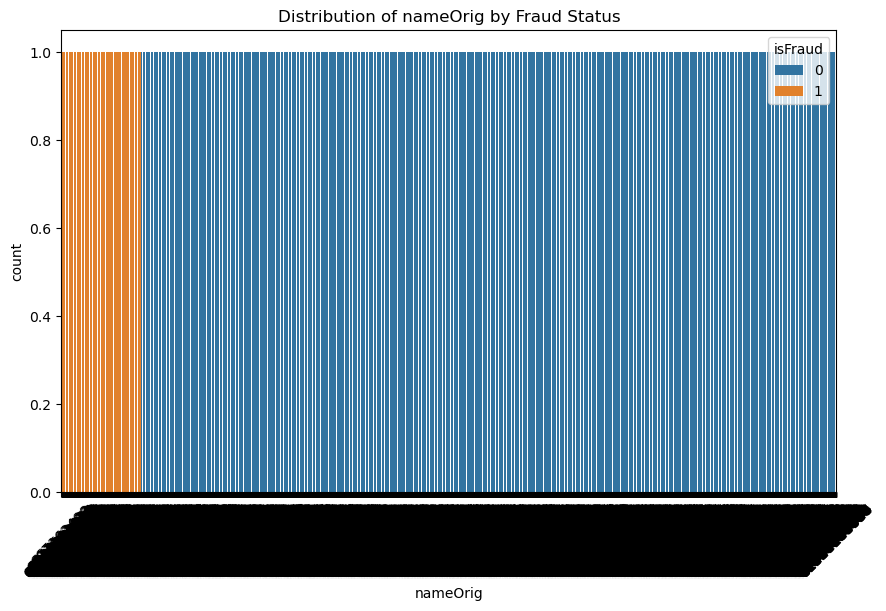


Unique values in nameDest:
nameDest
C985934102     62
C1590550415    52
C1286084959    50
C1899073220    44
C977993101     44
C451111351     43
C1782113663    43
C2083562754    41
C1789550256    40
C1816757085    40
Name: count, dtype: int64


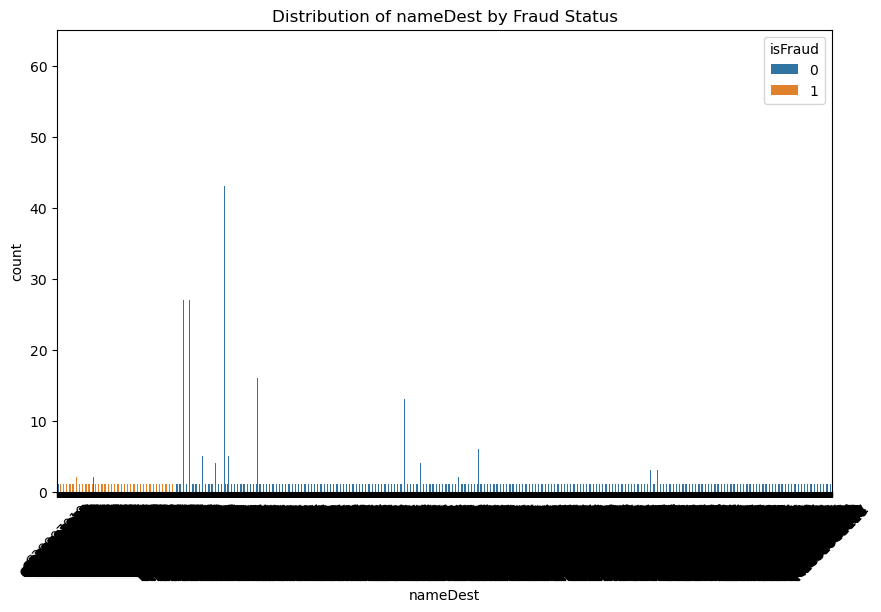

In [40]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts().head(10))  # Top 10 values to avoid clutter
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='isFraud', data=df)
    plt.title(f'Distribution of {col} by Fraud Status')
    plt.xticks(rotation=45)
    plt.show()

In [41]:
categorical_cols = df.select_dtypes(include=['object']).columns

In [42]:
for col in categorical_cols:
    print(f"\nUnivariate Analysis for {col}:")


Univariate Analysis for type:

Univariate Analysis for nameOrig:

Univariate Analysis for nameDest:


In [43]:
freq_table = df[col].value_counts().head(10)  # Top 10 categories to avoid clutter
print(freq_table)

nameDest
C985934102     62
C1590550415    52
C1286084959    50
C1899073220    44
C977993101     44
C451111351     43
C1782113663    43
C2083562754    41
C1789550256    40
C1816757085    40
Name: count, dtype: int64


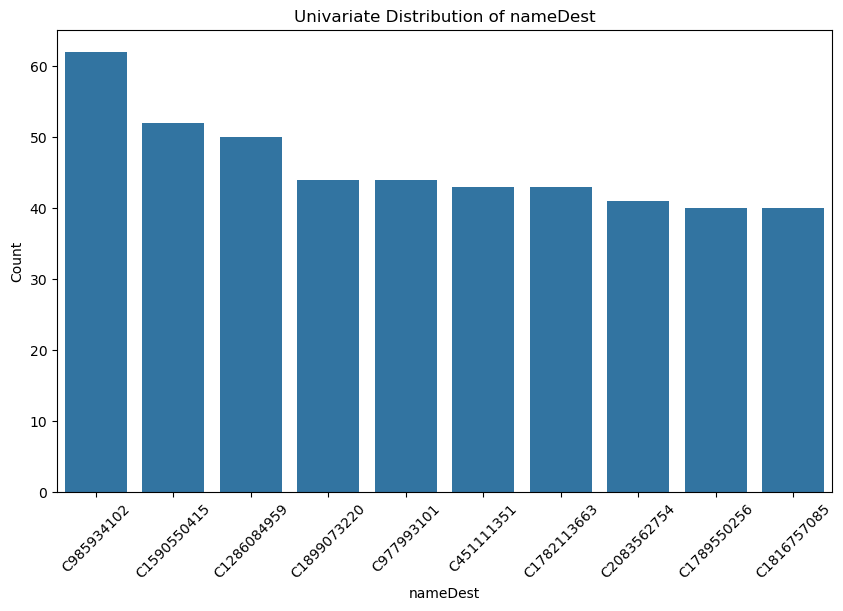

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x=col, data=df, order=freq_table.index)
plt.title(f'Univariate Distribution of {col}')
plt.xlabel(col)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [45]:
print(f"Percentage Distribution (Top 10):")
print((freq_table / len(df) * 100).round(2))

Percentage Distribution (Top 10):
nameDest
C985934102     0.56
C1590550415    0.47
C1286084959    0.45
C1899073220    0.39
C977993101     0.39
C451111351     0.39
C1782113663    0.39
C2083562754    0.37
C1789550256    0.36
C1816757085    0.36
Name: count, dtype: float64


**PREPROCESSING**

In [48]:
df['nameOrig'] = df['nameOrig'].str.upper()
df['nameDest'] = df['nameDest'].str.upper()
print("First few rows after standardization:\n", df[['nameOrig', 'nameDest']].head())

First few rows after standardization:
       nameOrig     nameDest
0  C1305486145   C553264065
1   C840083671    C38997010
2  C1420196421   C972765878
3  C2101527076  C1007251739
4   C137533655  C1848415041


**OUTLIERS**

**OUTLIERS**

In [51]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)
    return df

In [52]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('isFraud')
for col in ['amount', 'oldbalanceDest', 'newbalanceDest']:
    df = cap_outliers(df, col)

In [53]:
df['nameDest_freq'] = df['nameDest'].map(df['nameDest'].value_counts())

In [54]:
print(df.head(10))

   step      type        amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1  TRANSFER     181.00000  C1305486145         181.00             0.0   
1     1  CASH_OUT     181.00000   C840083671         181.00             0.0   
2     1  TRANSFER    2806.00000  C1420196421        2806.00             0.0   
3     1  CASH_OUT    2806.00000  C2101527076        2806.00             0.0   
4     1  TRANSFER   20128.00000   C137533655       20128.00             0.0   
5     1  CASH_OUT   20128.00000  C1118430673       20128.00             0.0   
6     1  CASH_OUT  378421.51125   C749981943           0.00             0.0   
7     1  TRANSFER  378421.51125  C1334405552     1277212.77             0.0   
8     1  CASH_OUT  378421.51125   C467632528     1277212.77             0.0   
9     1  TRANSFER   35063.63000  C1364127192       35063.63             0.0   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  nameDest_freq  
0   C553264065             0.0            0.00        1  

In [55]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [56]:
#Selecting features and target

In [57]:
X = df.drop(columns=['isFraud'])
y = df['isFraud']

In [58]:
categorical_cols = ['type']  # nameOrig_first can be dropped if not useful
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.columns = encoder.get_feature_names_out(categorical_cols)

In [59]:
print(X_encoded.columns)

Index(['type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'], dtype='object')


In [60]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

**Splitting the Test and Train Data**

In [62]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [63]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("\nSample of X_train:")
print(X_train.head())

X_train shape: (8913, 10)
X_test shape: (2229, 10)

Sample of X_train:
           step      type    amount     nameOrig  oldbalanceOrg  \
10340 -0.106907   PAYMENT -0.628548  C1877303247      -0.411801   
9605  -0.106907  CASH_OUT  1.630746  C2056319805      -0.431244   
6697  -0.169147   PAYMENT -0.689559  C1754096028      -0.431244   
3437  -0.480349   PAYMENT -0.729931  C1559788797      -0.373004   
5526  -0.293628   PAYMENT -0.699794  C1163216403      -0.428508   

       newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  \
10340       -0.381213  M1293905436       -0.638844       -0.629582   
9605        -0.394754   C766681183        1.936335        1.855818   
6697        -0.394754  M1686106686       -0.638844       -0.629582   
3437        -0.335123  M1980194149       -0.638844       -0.629582   
5526        -0.393912  M1675999402       -0.638844       -0.629582   

       nameDest_freq  
10340      -0.512767  
9605        1.121084  
6697       -0.512767  
3437       -0

In [64]:
categorical_cols = X.select_dtypes(include=['object']).columns

In [65]:
print(categorical_cols)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [66]:
X = pd.get_dummies(X, columns=categorical_cols)

**MODELING**

 
 Here we will train the model with more than two model

**LOGISTIC REGRESSION**

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [71]:
   print(X_train.dtypes)
   print(y_train.dtypes)

step                   float64
amount                 float64
oldbalanceOrg          float64
newbalanceOrig         float64
oldbalanceDest         float64
                        ...   
nameDest_M998458782       bool
nameDest_M998935228       bool
nameDest_M998983750       bool
nameDest_M999036382       bool
nameDest_M999221400       bool
Length: 18662, dtype: object
int64


In [72]:
   print(X_train.isnull().sum())
   print(y_train.isnull().sum())

step                   0
amount                 0
oldbalanceOrg          0
newbalanceOrig         0
oldbalanceDest         0
                      ..
nameDest_M998458782    0
nameDest_M998935228    0
nameDest_M998983750    0
nameDest_M999036382    0
nameDest_M999221400    0
Length: 18662, dtype: int64
0


In [73]:
y_pred = model.predict(X_test)

In [74]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [75]:
print("Model Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation:
Accuracy: 0.99
Precision: 1.00
Recall: 0.87
F1-Score: 0.93

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1999
           1       1.00      0.87      0.93       230

    accuracy                           0.99      2229
   macro avg       0.99      0.93      0.96      2229
weighted avg       0.99      0.99      0.99      2229



In [76]:
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [77]:
print(y_pred_prob)

[7.24584076e-04 9.99996596e-01 2.73553826e-03 ... 6.27199299e-04
 7.23852541e-04 7.03348982e-04]


In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score,confusion_matrix, ConfusionMatrixDisplay
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1999
           1       1.00      0.87      0.93       230

    accuracy                           0.99      2229
   macro avg       0.99      0.93      0.96      2229
weighted avg       0.99      0.99      0.99      2229

ROC-AUC Score: 0.9347826086956521


In [79]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [80]:
# Calculate and plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

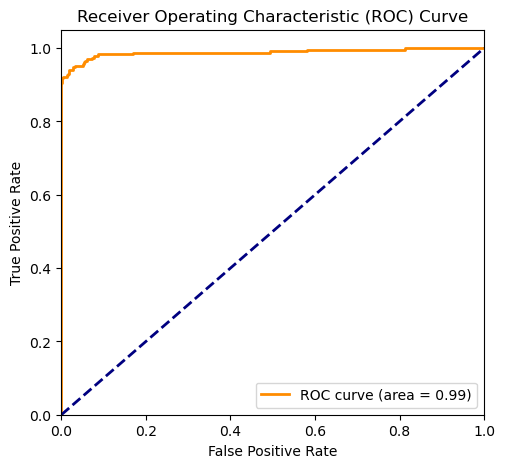

In [81]:
# ROC Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

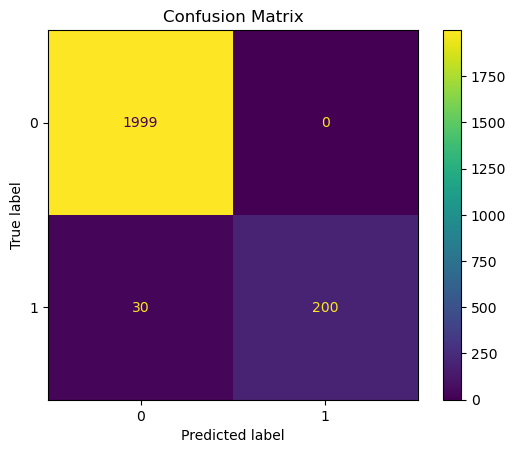

In [82]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

In [84]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)  # 100 trees
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [85]:
y_pred_rf = rf_model.predict(X_test)

In [86]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

In [87]:
print("Random Forest Evaluation:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1-Score: {f1_rf:.2f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Evaluation:
Accuracy: 0.99
Precision: 1.00
Recall: 0.94
F1-Score: 0.97

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1999
           1       1.00      0.94      0.97       230

    accuracy                           0.99      2229
   macro avg       1.00      0.97      0.98      2229
weighted avg       0.99      0.99      0.99      2229



In [88]:
# Calculate and plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

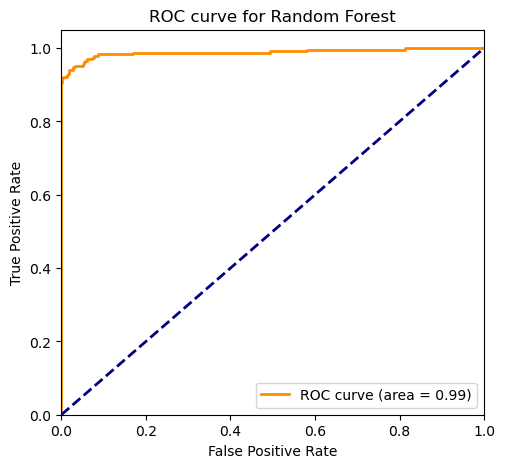

In [89]:
plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Random Forest')
plt.legend(loc="lower right")

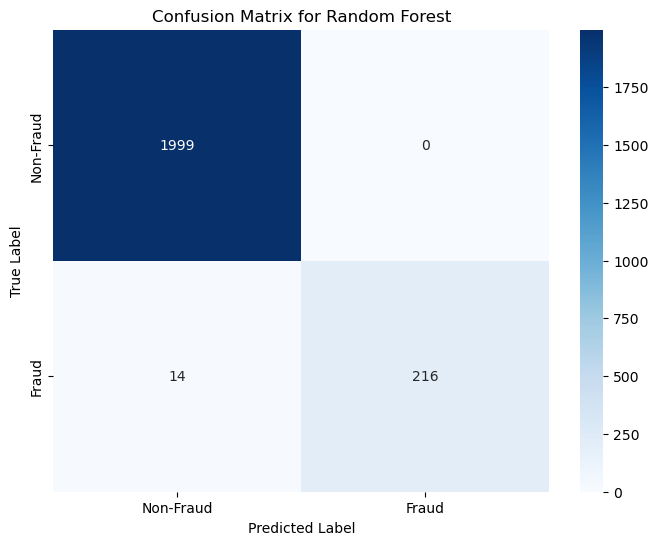

In [90]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [91]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

In [ ]:
svm_model = SVC(random_state=42, probability=True)  # probability=True for ROC curve if needed
svm_model.fit(X_train, y_train)

In [ ]:
y_pred_svm = svm_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

In [ ]:
print("SVM Evaluation:")
print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Precision: {precision_svm:.2f}")
print(f"Recall: {recall_svm:.2f}")
print(f"F1-Score: {f1_svm:.2f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_svm))

In [ ]:
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

In [ ]:
# Calculate ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_svm)
roc_auc = roc_auc_score(y_test, y_pred_proba_svm)
print(roc_auc)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc="lower right")
plt.show()

print("ROC-AUC Score:", roc_auc)

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [ ]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

In [ ]:
print("XGBoost Evaluation:")
print(f"Accuracy: {accuracy_xgb:.2f}")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall: {recall_xgb:.2f}")
print(f"F1-Score: {f1_xgb:.2f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_xgb))

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_xgb)
roc_auc = roc_auc_score(y_test, y_pred_xgb)
print(roc_auc)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()

print("ROC-AUC Score:", roc_auc)

In [ ]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Summary Comparison (to be run after all models)
models = ['Logistic Regression', 'Random Forest', 'SVM', 'XGBoost']
accuracies = [accuracy, accuracy_rf, accuracy_svm, accuracy_xgb]
precisions = [precision, precision_rf, precision_svm, precision_xgb]
recalls = [recall, recall_rf, recall_svm, recall_xgb]
f1_scores = [f1, f1_rf, f1_svm, f1_xgb]

In [ ]:
comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores
})

In [ ]:
print("\nModel Comparison:")
print(comparison_df)

In [ ]:
# Set up the bar width and positions
bar_width = 0.2
index = range(len(models))

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot bars for each metric
plt.bar(index, accuracies, bar_width, label='Accuracy', color='skyblue')
plt.bar([i + bar_width for i in index], precisions, bar_width, label='Precision', color='lightgreen')
plt.bar([i + 2 * bar_width for i in index], recalls, bar_width, label='Recall', color='salmon')
plt.bar([i + 3 * bar_width for i in index], f1_scores, bar_width, label='F1-Score', color='lightcoral')

# Customize the plot
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks([i + 1.5 * bar_width for i in index], models, rotation=45)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
best_model = comparison_df.loc[comparison_df['Recall'].idxmax()]
print(f"\nBest Model based on Recall: {best_model['Model']} with Recall: {best_model['Recall']:.2f}")

In [ ]:
best_model = comparison_df.loc[comparison_df['Accuracy'].idxmax()]
print(f"\nBest Model based on Accuracy: {best_model['Model']} with Accuracy: {best_model['Accuracy']:.2f}")

In [ ]:
best_model = comparison_df.loc[comparison_df['F1-Score'].idxmax()]
print(f"\nBest Model based on F1-Score: {best_model['Model']} with F1-Score: {best_model['F1-Score']:.2f}")

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import numpy as np

In [ ]:
X_full = pd.concat([X_train, X_test])
y_full = pd.concat([y_train, y_test])

In [ ]:
# Cross-validation
xgb_model_cv = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
cv_scores = cross_val_score(xgb_model_cv, X_full, y_full, cv=5, scoring='f1')
print("Cross-Validation F1-Scores:", cv_scores)
print(f"Mean CV F1-Score: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='xgboost')

In [ ]:
# Predict and evaluate on original test set
y_pred_xgb = xgb_model.predict(X_test)
print("\nTuned XGBoost Evaluation on Test Set:")
print(classification_report(y_test, y_pred_xgb))

In [ ]:
# Confusion Matrix for tuned model
cm_best_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for Tuned XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Feature Importance for XGBoost
importances = xgb_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
print("\nFeature Importance:")
print(feature_importance_df)

In [ ]:
import joblib
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Retraining the full dataset with best parameters 
xgb_model.fit(X_full, y_full)

In [ ]:
# Final prediction and evaluation on test set
y_pred_final = xgb_model.predict(X_test)
print("\nFinal XGBoost Evaluation on Test Set:")
print(classification_report(y_test, y_pred_final))

In [ ]:
# Confusion Matrix for final model
cm_final = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for Final XGBoost Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Save the model
model_filename = 'final_xgboost_model.joblib'
joblib.dump(xgb_model, model_filename)
print(f"\nModel saved as {model_filename}")

In [ ]:
import joblib
import pandas as pd

In [ ]:
xgb_model = joblib.load('final_xgboost_model.joblib')

In [ ]:
def predict_fraud(model, data):
    predictions = model.predict(data)
    probabilities = model.predict_proba(data)[:, 1]
    results = pd.DataFrame({'Prediction': predictions, 'Probability': probabilities})
    return results

In [ ]:
# Example (Test data)
sample_test_data = X_test.iloc[:5] 
results = predict_fraud(xgb_model, sample_test_data)
print("\nExample Predictions on Test Data:")
print(results)